# Stratified sampling

[HPA implementation](https://www.kaggle.com/ronaldokun/multilabel-stratification-cv-and-ensemble)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skmultilearn.model_selection import IterativeStratification

In [2]:
path = 'D:/HPA_comp/train/train.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
# Transform string label to 19 one-hot columns
cols = [str(i) for i in list(range(19))]
df[cols] = np.nan

# Apply mapping
def encoder(row):
    labels = row['Label'].split('|')
    for label in labels:
        row[label] = 1    
    return row

df = df.apply(encoder, axis=1)
df.fillna(0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21806 entries, 0 to 21805
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      21806 non-null  object 
 1   Label   21806 non-null  object 
 2   0       21806 non-null  float64
 3   1       21806 non-null  float64
 4   2       21806 non-null  float64
 5   3       21806 non-null  float64
 6   4       21806 non-null  float64
 7   5       21806 non-null  float64
 8   6       21806 non-null  float64
 9   7       21806 non-null  float64
 10  8       21806 non-null  float64
 11  9       21806 non-null  float64
 12  10      21806 non-null  float64
 13  11      21806 non-null  float64
 14  12      21806 non-null  float64
 15  13      21806 non-null  float64
 16  14      21806 non-null  float64
 17  15      21806 non-null  float64
 18  16      21806 non-null  float64
 19  17      21806 non-null  float64
 20  18      21806 non-null  float64
dtypes: float64(19), object(2)
memory us

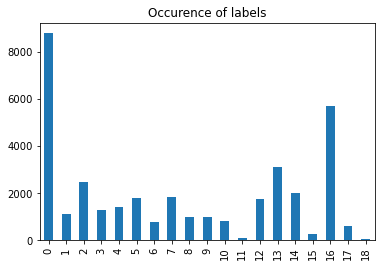

In [6]:
ohe_labels = df.iloc[:, 2:]
ohe_labels.sum().plot(kind='bar', title='Occurence of labels')
plt.show()

## Scikit-MultiLearn

[iterative_stratification](http://scikit.ml/api/skmultilearn.model_selection.iterative_stratification.html#skmultilearn.model_selection.iterative_stratification.iterative_train_test_split)

With an incredibly imbalanced dataset it is important to have a good sampling strategy for training and validation sets. We will use SciKit Multilearn's implementation of iterative train-test splitting to ensure rare classes appear in both sets with roughly equal proportions.

In [7]:
# Assign X and y to numpy arrays
X, y = ohe_labels.index.values, ohe_labels.values

In [8]:
# How many folds?
nfolds = 5

In [9]:
k_fold = IterativeStratification(n_splits=nfolds)
splits = list(k_fold.split(X, y))

In [10]:
splits[0][0].shape, splits[0][1].shape

((17443,), (4363,))

In [15]:
fold_splits = np.zeros(df.shape[0]).astype(int)

for i in range(nfolds):
    fold_splits[splits[i][1]] = i

df['Split'] = fold_splits
df.head(5)

,ID,Label,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,Split
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


In [18]:
df.Split.unique()

array([1, 0, 3, 2, 4])

# Example

If we wanted to train/cross-validate on fold 0 in the dataset we would do:

In [13]:
# Example on fold 0
fold = 0

train_df = df[df.Split != fold]
val_df = df[df.Split == fold]

In [19]:
train_df

,ID,Label,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,Split
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
6,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21799,daa22470-bbca-11e8-b2bc-ac1f6b6435d0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
21801,dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
21803,dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0,14|0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
21804,df573730-bbca-11e8-b2bc-ac1f6b6435d0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


## Labels are now well distributed between training and validation sets

<AxesSubplot:title={'center':'Validation set: Occurence of labels'}>

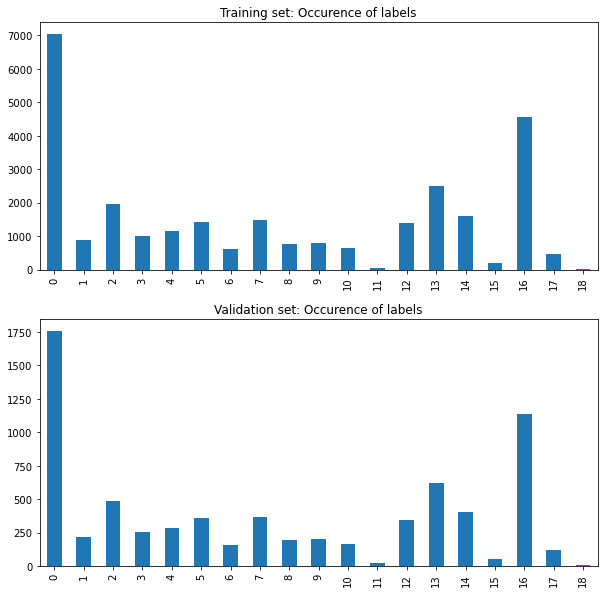

In [24]:
fig, ax = plt.subplots(2, figsize=(10,10))
train_df.iloc[:, 2:-1].sum().plot(kind='bar', title='Training set: Occurence of labels', ax=ax[0])
val_df.iloc[:, 2:-1].sum().plot(kind='bar', title='Validation set: Occurence of labels', ax=ax[1])